<a href="https://colab.research.google.com/github/Leonardo8Cos/Real-Estate-/blob/main/RealEstate1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pacchetti da importare

In [ ]:
import pandas as pd
import numpy as np
import requests
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

#%matplotlib inline   #https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Pacchetti per impportare da Drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Importo i dati da Drive

QUI IMPORTO IL TRAIN


In [ ]:
#https://drive.google.com/file/d/1Vua-9k9n8MojHvlQYf7zQoUVMCsxVjCs/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1Vua-9k9n8MojHvlQYf7zQoUVMCsxVjCs'})
fileDownloaded.GetContentFile('train.csv')
import pandas as pd
TTrain = pd.read_csv('train.csv', delimiter=',' )
TTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,

QUI IMPORTO IL TEST

In [ ]:
#https://drive.google.com/file/d/1xwt-9B-CL9sp6e5m1ukvuUwmMBolPhws/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1xwt-9B-CL9sp6e5m1ukvuUwmMBolPhws'})
fileDownloaded.GetContentFile('test.csv')
import pandas as pd
TTest = pd.read_csv('test.csv', delimiter=',' )
TTest
#------------------------------------------------------------------------
#https://drive.google.com/file/d/1Dk9T8UveZkSa4HOGdCl1XPDzOlprBYUu/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1Dk9T8UveZkSa4HOGdCl1XPDzOlprBYUu'})
fileDownloaded.GetContentFile('sample_submission.csv')
import pandas as pd
yttest = pd.read_csv('sample_submission.csv', delimiter=',' )
TTest= TTest.merge(yttest, on='Id')
yttest.shape

(1459, 2)

In [ ]:
TTest.shape


(1459, 81)

## Importo i dati

In [ ]:
#dftest = pd.read_csv(/content/drive/MyDrive/Colab Notebooks/Data-RealEstate/test.csv)
#url = 'https://drive.google.com/file/d/1xwt-9B-CL9sp6e5m1ukvuUwmMBolPhws/view?usp=sharing'

#dtest = pandas.read_csv (url)

In [ ]:
#Train= pd.read_csv ('/content/train.csv')
#Test= pd.read_csv ('/content/test.csv')
#ytest=pd.read_csv ('/content/sample_submission.csv')
TTrain
#TTest=Test
TTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,...,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,...,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.394
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,...,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.684
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,...,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.478
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,...,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.080


Al dataset di Test manca la Y quindi la aggiungiamo

In [ ]:
#TTest= pd.concat([TTest, yttest], axis=1)

#TTest= TTest.merge(yttest, on='Id')


In [ ]:
TTest.shape

(1459, 81)

In [ ]:
#TTest.info()

#Uniamo i due dataset

In [ ]:
frames = [TTrain, TTest]
Datatot = pd.concat(frames)

In [ ]:
Datatot

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,...,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,...,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,...,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,...,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,...,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.000,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,GasA,...,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,5,Typ,0,NaN,NaN,nan,NaN,0.000,0.000,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.221
1455,2916,160,RM,21.000,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,252.000,Unf,0.000,294.000,546.000,GasA,...,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.000,Unf,1.000,286.000,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778
1456,2917,20,RL,160.000,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,ALQ,1224.000,Unf,0.000,0.000,1224.000,GasA,...,Y,SBrkr,1224,0,0,1

# Trasformiamo le qualitative in quantitative

Quantitative: MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1,
 Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual,
  ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC,
   CentralAir, Electrical, KitchenQual, Functional, PavedDrive, SaleType, SaleCondition

   Utili: LandSlope*, ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC, CentralAir, KitchenQual, GarageCond*, PavedDrive, PoolQC(dummy)

Neighborhood -> il quartiere ha una sua importanza ma necessita di molte dummy. Propongo come lavoro conclusivo.

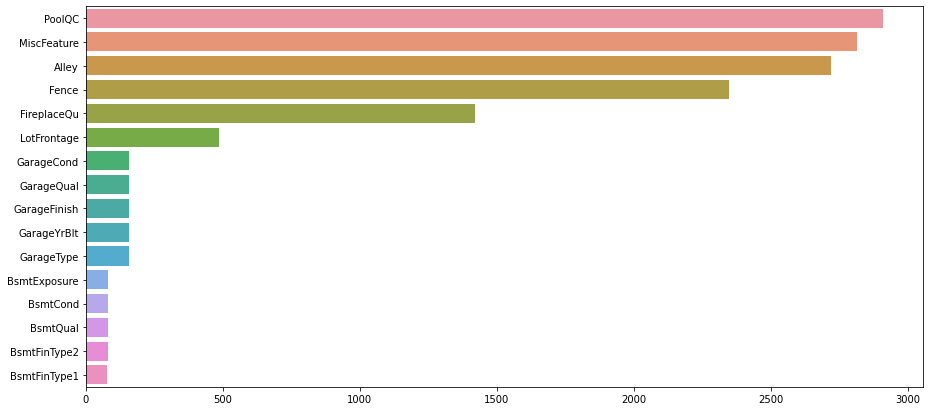

In [ ]:
# L'idea è che alcune variabili con valori NaN in realtà sono solo pensate male, perchè NaN vuol dire "0" o "Assente"
fig=plt.figure(figsize=(15,7))
train_null=Datatot.isnull().sum()[Datatot.isnull().sum()>50].sort_values(ascending=False)
sns.barplot(y=train_null.index,x=train_null)

##Partiamo dal label encoder

In [ ]:
Datatot["KitchenAbvGr"].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

Con questo codice vedo quali modalità sostituire delle variabili non numeriche: 

In [ ]:
cleanup_nums = {"ExterQual":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                
                "LandSlope":     {"Sev": 0, "Mod": 1, "Gtl": 2},
                    
                "ExterCond":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "BsmtQual":      {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                                 
                "BsmtCond":      {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "HeatingQC":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "CentralAir":    {"N": 0, "Y": 1},

                "KitchenQual":   {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "GarageCond":    {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},

                "PavedDrive":    {"N": 0, "P": 1, "Y": 2},

                "PoolQC":        {"Fa": 1, "TA": 1, "Gd": 1, "Ex": 1 } }

In [ ]:
Datatot = Datatot.replace(cleanup_nums)
Datatot.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,3,2,PConc,3.000,2.000,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,...,1,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,3.000,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,2.000,2,0,61,0,0,0,0,nan,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,2,2,CBlock,3.000,2.000,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,...,1,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,2.000,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,2.000,2,298,0,0,0,0,0,nan,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,3,2,PConc,3.000,2.000,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,...,1,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,3.000,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,2.000,2,0,42,0,0,0,0,nan,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,2,2,BrkTil,2.000,3.000,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,...,1,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,3.000,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,2.000,2,0,35,272,0,0,0,nan,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,3,2,PConc,3.000,2.000,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,...,1,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,3.000,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,2.000,2,192,84,0,0,0,0,nan,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [ ]:
#from statistics import mode 
#mode(Datatot['SalePrice'])
np.mean(Datatot['SalePrice'])

182884.48056127277

LA FUNZIONE REPLACE NON SOSTITUISCE IL VALORE NAN QUINDI ABBIAMO USATO IL COMANDO "FILLNA" PER TRASFORMARE I NAN IN ZER0

In [ ]:
Datatot['PoolQC'] = Datatot['PoolQC'].fillna(0)

In [ ]:
#Serve per la sezione con i quartieri
Datatest=Datatot

# Lavoro con i NAN

In [ ]:
count_nan = Datatot.isnull().sum().sort_values(ascending=False) # the number of missing values for every column
percent = ((Datatot.isnull().sum()/Datatot.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([count_nan, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
MiscFeature,2814,96.403
Alley,2721,93.217
Fence,2348,80.439
FireplaceQu,1420,48.647
LotFrontage,486,16.650
GarageYrBlt,159,5.447
GarageQual,159,5.447
GarageCond,159,5.447
GarageFinish,159,5.447
GarageType,157,5.379


Droppiamo le colonne con troppi NAN (>100): Alley, FireplaceQu, PoolQC, Fance, MiscFeature                   

In [ ]:
Datatot.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature', 'GarageType', 'GarageYrBlt' ,'GarageFinish' , 'GarageQual'], axis = 1, inplace = True)
#check how many values are missing (NaN) - after we dropped 'bmi'
count_nan = Datatot.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])


MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinSF1        1
BsmtFinType2     80
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Electrical        1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageCars        1
GarageArea        1
GarageCond      159
SaleType          1
dtype: int64


Droppiamo i record (osservazioni RIGHE) a cui mancano valori (NAN)

In [ ]:
Datatot.dropna(inplace=True)
Datatot.reset_index(drop=True, inplace=True)
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = Datatot.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan < 0])


Series([], dtype: int64)


In [ ]:
#Datatot.info(5)

## Analisi Preliminari

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


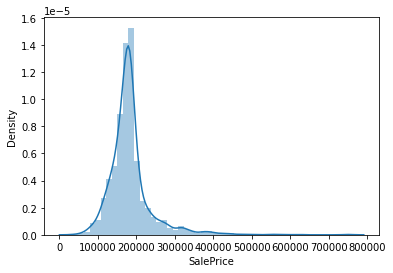

In [ ]:
#histogram
sns.distplot(Datatot['SalePrice']);
#codici pe aggiungere media e mediana in due diversi colori, cambia dimensioni

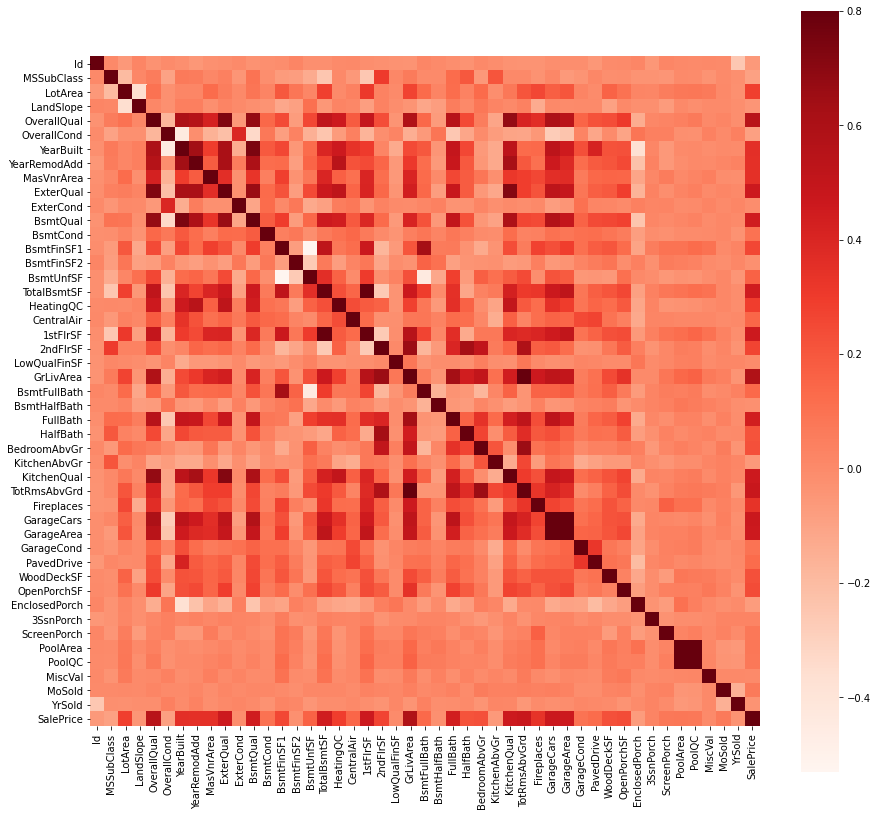

In [ ]:
#Correlation Graph
corrmat = Datatot.corr()
f, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='Reds');

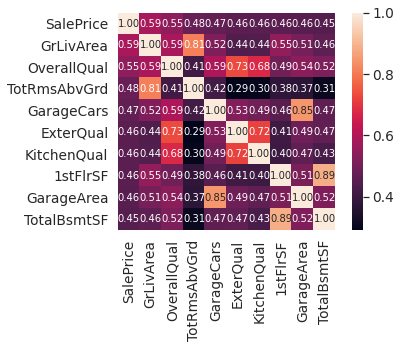

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(Datatot[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

3 possibili fonti di multicollinearità:
TotRmsAbvGrd con GrLivArea, droppo-> TotRmsAbvGrd

*   TotRmsAbvGrd con GrLivArea, droppo-> TotRmsAbvGrd
*   GarageCars con GareageArea, droppo-> GareageArea
*   TotalBsmtSF con 1stFlrSF, droppo-> TotalBsmtSF


In [ ]:
#scatterplot
'''sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(Datatot[cols], size = 4.5)
plt.show();'''

"sns.set()\ncols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']\nsns.pairplot(Datatot[cols], size = 4.5)\nplt.show();"

## Esportiamo i dati per creare il cruscotto su Data Studio

In [ ]:
Datatot.to_csv(r'D:\Ale\Documenti\Ale\Corso Project work\Datatot.csv', index = False,header=True)

## Droppiamo le variabili non numeriche

DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields: 
MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, PavedDrive, SaleType, SaleCondition.

In [ ]:
'''MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1,
 Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual,
  ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC,
   CentralAir, Electrical, KitchenQual, Functional, PavedDrive, SaleType, SaleCondition'''
#Volendo tenere le variabili numeriche originali 
'''Datatot.drop(['MSZoning','Street','LotShape','LandContour','LotConfig','Utilities','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'],axis=1,inplace=True)'''

"Datatot.drop(['MSZoning','Street','LotShape','LandContour','LotConfig','Utilities','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',\n'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',\n'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'],axis=1,inplace=True)"

In [ ]:
#Teniamo le variabili che abbiamo convertito da qualitative a quantitative
#Variabili da tenere: 'TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageCond', 'PavedDrive', 'PoolQC'
Datatot.drop(['Id', 'MSZoning','Street','LotShape','LandContour','LotConfig','Utilities','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
'Electrical','Functional','SaleType','SaleCondition','TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF'],axis=1,inplace=True) 

#Variabili da cancellare per la multicollinearità: ,'KitchenAbvGr','YearRemodAdd','GarageCond','OverallQual','1stFlrSF'
Datatot.drop(['YrSold', 'YearBuilt', '2ndFlrSF','LowQualFinSF'],axis=1,inplace=True) 

In [ ]:
#list(Datatot.columns.values) 

## Outlier

Analizzo i grafici delle 10 variabili più correlate per visualizzare i dati anomali

In [ ]:
#metodo alternativo
'''r=Datatot[Datatot.columns[1:]].corr()['SalePrice']
r.sort_values(ascending=False).head(10)'''

In [ ]:
corr_matrix = Datatot.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False).head(10))

In [3]:
Dtot=Datatot

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
def graph(x,y,r,c,title,line):
    sns.scatterplot(Dtot[x],Dtot[y],color=('orange'),ax=ax[r][c])
    sns.lineplot(x=line,y=Dtot[y],color='red',ax=ax[r][c])
    ax[r][c].set_ylabel(y)
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

out=[300,1111,2018,5,5,4000]
for r,col in enumerate(np.array(['GrLivArea','LotArea','YearBuilt','ExterQual','KitchenQual','1stFlrSF'])):
    c=r%2
    graph(col,'SalePrice', r//2 ,c ,col , out[r])

In [7]:
Dtot['SalePrice'].sort_values(ascending=False).head(15)

In [ ]:
#Elimino manualmente tre outlier di y
i1=Dtot['SalePrice'].sort_values(ascending=False).head(3).index
Dtot.drop(i1, axis=0, inplace=True)

In [8]:
#Elimino manualmente tre outlier di X=GrLivArea
i2=Dtot['GrLivArea'].sort_values(ascending=False).head(3).index
Dtot.drop(i2, axis=0, inplace=True)

#Elimino manualmente tre outlier di X=LotArea
i3=Dtot['LotArea'].sort_values(ascending=False).head(4).index
Dtot.drop(i3, axis=0, inplace=True)

"i3=Dtot['LotArea'].sort_values(ascending=False).head(4).index\nDtot.drop(i3, axis=0, inplace=True)"

Il seguente codice identifica (ma non elimina) i percentili finali di una specifica X:

In [ ]:
out=[]
def Winsorization_outliers(Dtot):
    q1 = np.percentile(Dtot , 1)
    q3 = np.percentile(Dtot , 99)
    for i in Dtot:
        if i > q3 or i < q1:

            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(Dtot['GrLivArea'])

In [10]:
#Dtot['GrLivArea'].drop(out, axis=0)
#i_o=out.index
#Dtot.drop(i_o, axis=0, inplace=True)


# Multicollinearità



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Datatot.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Datatot.values, i)
                          for i in range(len(Datatot.columns))]
  
#print(vif_data)

In [ ]:
print(vif_data.sort_values('VIF',ascending=False).head(150))

In [ ]:
temp_pca = pd.DataFrame()
temp_pca = Datatot[['BsmtCond','ExterQual','ExterCond', 'HeatingQC','OverallQual','OverallCond','YearRemodAdd' ]]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(temp_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])


In [ ]:
pca.explained_variance_ratio_

##Dividiamo il datset in Train e Test


In [ ]:
Dtot=Datatot
#Dtot.info()

In [ ]:
from sklearn.model_selection import train_test_split
X, y = Dtot.iloc[: , :-1], Dtot.iloc[:,-1]


Restituisce due array

In [ ]:
len(y), len(X)

In [ ]:
'''X_train,X_test, y_train,y_test=\
  train_test_split(X,y, 
                   test_size=0.3, 
                   random_state=0,
                   stratify=y)
'''                   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=420)

In [ ]:
#Controllo non ci siano variabili non numeriche ("objects")
#X_train.info()

##XGBoost

In [ ]:
#need to scale in case we want to use linear models
'''Scaler = StandardScaler()
all_scaled = pd.DataFrame(Scaler.fit_transform(all_df))'''

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=4,learning_rate=0.003,n_estimators=2000,reg_alpha=0.01,reg_lambda=0.0001,n_jobs=-1,min_child_weight=1)
XGB.fit(X_train,y_train)
#print ("Training score:",XGB.score(X_train,y_train),"Test Score:",XGB.score(X_test,y_test))

In [ ]:
print ("Training score:",XGB.score(X_train,y_train),"Test Score:",XGB.score(X_test,y_test))

In [ ]:
#y predette
y_pred_xgb  = pd.DataFrame( XGB.predict(X_test))
#y_pred_xgb
y_real= (y_test[:,np.newaxis])
#Calcolo RootMeanSquaredError
MSE = np.square(np.subtract(y_real,y_pred_xgb)).mean()

RMSE = math.sqrt(MSE)
print('il RMSE è: %s' %RMSE)

## Metodo automatico di tuning per XGBOOST

In [ ]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
params = {'learning_rate': [0.004, 0.003], 'max_depth': [1,2], 'n_estimators': [2500, 2000],'min_child_weight': [3,4],'n_jobs': [-1]}

xgbr_reg = GridSearchCV(xgbr, params, cv = 10, n_jobs =-1)
xgbr_reg.fit(X_train,y_train)

print("Best params:{}".format(xgbr_reg.best_params_))

best_x = xgbr_reg.best_estimator_
y_train_pred_x = best_x.predict(X_train)
y_val_pred_x = best_x.predict(X_test)
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_train_pred_x))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_val_pred_x))))

##Random Forest

In [ ]:

rf = RandomForestRegressor()
params = {"max_depth":[25,30,27], "n_estimators":[35]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(X_train, y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

RMSE (XGBOOST) -> 22255    
RMSE (Random Forest) -> 22528             
XGBOOST si conferma come il modello più preciso

In [ ]:
r2_score(y_pred_test, y_test) ,r2_score(y_pred_train, y_train)

In [ ]:
#rf_reg.score(X_test, y_test)
rf_reg.score(X_train, y_train)

## Provo ad aggiungere i quartieri

In [ ]:
frames = [TTrain, TTest]
Datatot = pd.concat(frames)
cleanup_nums = {"ExterQual":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "LandSlope":     {"Sev": 0, "Mod": 1, "Gtl": 2},    
                "ExterCond":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "BsmtQual":      {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},                                 
                "BsmtCond":      {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "HeatingQC":     {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "CentralAir":    {"N": 0, "Y": 1},
                "KitchenQual":   {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "GarageCond":    {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "PavedDrive":    {"N": 0, "P": 1, "Y": 2},
                "PoolQC":        {"Fa": 1, "TA": 1, "Gd": 1, "Ex": 1 } }
Datatot = Datatot.replace(cleanup_nums)
Datatot['PoolQC'] = Datatot['PoolQC'].fillna(0)
Datatest=Datatot
District= pd.get_dummies(Datatest, prefix='' , prefix_sep='',drop_first=True, columns=['Neighborhood']) 

In [ ]:
#District

In [ ]:
District.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature', 'GarageType', 'GarageYrBlt' ,'GarageFinish' , 'GarageQual'], axis = 1, inplace = True)

District.dropna(inplace=True)
District.reset_index(drop=True, inplace=True)
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = District.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan < 0])

District.drop(['Id', 'MSZoning','Street','LotShape','LandContour','LotConfig','Utilities','Condition1','Condition2','BldgType','HouseStyle',
'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
'Electrical','Functional','SaleType','SaleCondition','TotRmsAbvGrd', 'GarageArea', 'TotalBsmtSF'],axis=1,inplace=True) 
District.reset_index(drop=True, inplace=True)

#Variabili da cancellare per la multicollinearità:'LowQualFinSF','KitchenAbvGr','YearRemodAdd','GarageCond','OverallQual','1stFlrSF','LandSlope'
District.drop(['YrSold', 'YearBuilt', '2ndFlrSF','LowQualFinSF','KitchenAbvGr','YearRemodAdd','GarageCond','OverallQual','1stFlrSF'],axis=1,inplace=True) 
District.reset_index(drop=True, inplace=True)

In [ ]:
Dist=District
Dist.head()

In [ ]:
corr_matrix = Dist.corr()
print(corr_matrix["SalePrice"].sort_values(ascending=False).head(10))

In [ ]:

from sklearn.model_selection import train_test_split
XX, yy = Dist.iloc[: , :-1], Dist["SalePrice"]
XX_train, XX_test, yy_train, yy_test = train_test_split(
    XX, yy, test_size=0.30, random_state=420)

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=6,learning_rate=0.01,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
XGB.fit(XX_train,yy_train)

In [ ]:
XX_train.head()

In [ ]:
print ("Training score:",XGB.score(XX_train,yy_train),"Test Score:",XGB.score(XX_test,yy_test))

In [ ]:
#y predette
yy_pred_xgb  = pd.DataFrame( XGB.predict(XX_test))
#y_pred_xgb
yy_real= (yy_test[:,np.newaxis])
#Calcolo RootMeanSquaredError
MSE = np.square(np.subtract(yy_real,yy_pred_xgb)).mean()

RMSE = math.sqrt(MSE)
print('il RMSE è: %s' %RMSE)

Random Forest per dataset con quartiere

In [ ]:
rf = RandomForestRegressor()
params = {"max_depth":[22,20,21], "n_estimators":[30]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(XX_train, yy_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
yy_pred_train = best_estimator.predict(XX_train)
yy_pred_test = best_estimator.predict(XX_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(yy_train, yy_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(yy_test, yy_pred_test))))

In [ ]:
rf_reg.score(XX_train, yy_train) , rf_reg.score(XX_test, yy_test)